# **3er Challenge - TelecomX - Aaron Capellino**

---

## **Preparación de los datos**

### Extracción del Archivo Tratado

In [ ]:
import pandas as pd

In [ ]:
datos = pd.read_csv('/content/drive/MyDrive/Personal /Oracle/3er Challenge/Data /data_procesada.csv')

In [ ]:
datos.sample(5)

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total,charges_daily
1351,1952-dvvsw,No,female,0,1,0,10,1,0,no,...,0,0,0,0,one year,0,mailed check,20.10,184.40,0.67
2000,2829-hyvzp,No,male,0,0,0,29,1,0,no,...,0,0,0,0,one year,1,mailed check,19.80,572.20,0.66
1916,2710-wyvxg,No,female,0,0,0,3,1,0,dsl,...,0,1,0,1,two year,0,mailed check,71.10,213.35,2.37
2211,3090-hawsu,Sí,male,0,0,0,61,1,1,fiber optic,...,1,1,1,1,two year,1,credit card automatic,111.60,6876.05,3.72
1441,2073-qbvbi,No,female,0,1,0,41,0,0,dsl,...,0,1,0,0,one year,0,mailed check,35.45,1391.65,1.18


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7267 non-null   object 
 1   churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   seniorcitizen     7267 non-null   int64  
 4   partner           7267 non-null   int64  
 5   dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   phoneservice      7267 non-null   int64  
 8   multiplelines     7267 non-null   int64  
 9   internetservice   7267 non-null   object 
 10  onlinesecurity    7267 non-null   int64  
 11  onlinebackup      7267 non-null   int64  
 12  deviceprotection  7267 non-null   int64  
 13  techsupport       7267 non-null   int64  
 14  streamingtv       7267 non-null   int64  
 15  streamingmovies   7267 non-null   int64  
 16  contract          7267 non-null   object 


### Eliminación de Columnas Irrelevantes

In [ ]:
datos.drop('customerid',inplace=True,axis=1)

In [ ]:
datos.columns

Index(['churn', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'charges_monthly', 'charges_total', 'charges_daily'],
      dtype='object')

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   churn             7267 non-null   object 
 1   gender            7267 non-null   object 
 2   seniorcitizen     7267 non-null   int64  
 3   partner           7267 non-null   int64  
 4   dependents        7267 non-null   int64  
 5   tenure            7267 non-null   int64  
 6   phoneservice      7267 non-null   int64  
 7   multiplelines     7267 non-null   int64  
 8   internetservice   7267 non-null   object 
 9   onlinesecurity    7267 non-null   int64  
 10  onlinebackup      7267 non-null   int64  
 11  deviceprotection  7267 non-null   int64  
 12  techsupport       7267 non-null   int64  
 13  streamingtv       7267 non-null   int64  
 14  streamingmovies   7267 non-null   int64  
 15  contract          7267 non-null   object 
 16  paperlessbilling  7267 non-null   int64  


In [ ]:
datos.sample(5)

,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total,charges_daily
3867,No,male,0,1,1,46,1,0,no,0,...,0,0,0,0,two year,1,mailed check,20.10,936.85,0.67
3697,Sí,female,0,1,0,3,1,1,fiber optic,0,...,0,0,0,1,month-to-month,1,credit card automatic,91.50,242.95,3.05
4267,No,male,0,0,1,1,1,0,no,0,...,0,0,0,0,month-to-month,1,mailed check,20.25,20.25,0.68
5490,No,male,1,0,0,69,1,1,dsl,1,...,1,1,0,1,two year,0,credit card automatic,74.10,5031.00,2.47
1428,Sí,female,1,0,0,3,1,0,fiber optic,0,...,0,0,0,0,month-to-month,1,electronic check,70.40,204.70,2.35


### Encoding

In [ ]:
X = datos.drop('churn',axis=1)
y = datos['churn']

In [ ]:
X.sample(2)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total,charges_daily
686,female,0,1,0,69,1,1,no,0,0,0,0,0,0,two year,0,bank transfer automatic,24.25,1641.8,0.81
2436,male,0,1,1,55,1,0,dsl,1,1,0,1,0,0,two year,0,bank transfer automatic,57.55,3046.4,1.92


In [ ]:
y.sample(2)

,churn
5433,Sí
6977,Sí


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
columnas = X.columns

In [ ]:
one_hot = make_column_transformer((OneHotEncoder(drop='if_binary'),['gender',
                                  'internetservice','contract','paymentmethod']),
                                  remainder='passthrough',
                                  sparse_threshold=0,
                                  force_int_remainder_cols=False)

In [ ]:
X = one_hot.fit_transform(X)

In [ ]:
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__gender_male', 'onehotencoder__internetservice_dsl',
       'onehotencoder__internetservice_fiber optic',
       'onehotencoder__internetservice_no',
       'onehotencoder__contract_month-to-month',
       'onehotencoder__contract_one year',
       'onehotencoder__contract_two year',
       'onehotencoder__paymentmethod_bank transfer automatic',
       'onehotencoder__paymentmethod_credit card automatic',
       'onehotencoder__paymentmethod_electronic check',
       'onehotencoder__paymentmethod_mailed check',
       'remainder__seniorcitizen', 'remainder__partner',
       'remainder__dependents', 'remainder__tenure',
       'remainder__phoneservice', 'remainder__multiplelines',
       'remainder__onlinesecurity', 'remainder__onlinebackup',
       'remainder__deviceprotection', 'remainder__techsupport',
       'remainder__streamingtv', 'remainder__streamingmovies',
       'remainder__paperlessbilling', 'remainder__charges_monthly',
       'remainder__charges_tota

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_enconder = LabelEncoder()

In [ ]:
y = label_enconder.fit_transform(y)

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
y_serie = pd.Series(data = y, name='Churn')
y_serie

,Churn
0,0
1,0
2,1
3,1
4,1
...,...
7262,0
7263,1
7264,0
7265,0


### Verificación de la Proporción de Cancelación (Churn)

In [ ]:
# Para calcular la proporción, utilizaremos graficos y value_counts con nuestra variable dependiente y

# Porcentaje
y_porcentaje = y_serie.value_counts(normalize=True)
y_porcentaje

,proportion
Churn,
0,0.74281
1,0.25719


In [ ]:
# Frecuencia
y_frecuencia = y_serie.value_counts()
y_frecuencia

,count
Churn,
0,5398
1,1869


In [ ]:
# Creamos un DataFrame con la frecuencia y el porcentaje
dist_frec_porc = pd.DataFrame({'Frecuencia':y_frecuencia,'Porcentaje':y_porcentaje})
dist_frec_porc

,Frecuencia,Porcentaje
Churn,,
0,5398,0.74281
1,1869,0.25719


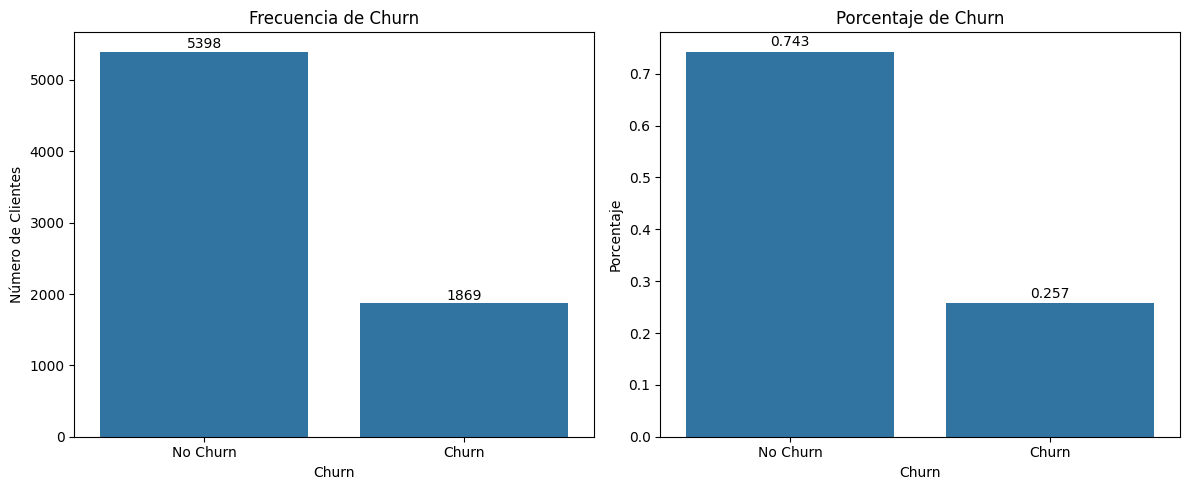

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig , ax = plt.subplots(1,2,figsize=(12,5))

# Gráfico de Frecuencia
sns.barplot(x = y_frecuencia.index,y = y_frecuencia.values, ax=ax[0])
ax[0].set_title('Frecuencia de Churn')
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(['No Churn', 'Churn'])
ax[0].set_ylabel('Número de Clientes')

# Añadir valores a las barras de frecuencia
for i, v in enumerate(y_frecuencia.values):
    ax[0].text(i, v + 50, str(v), ha='center')

# Gráfico de Porcentaje
sns.barplot(x = y_porcentaje.index,y = y_porcentaje.values, ax=ax[1])
ax[1].set_title('Porcentaje de Churn')
ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(['No Churn', 'Churn'])
ax[1].set_ylabel('Porcentaje')

# Añadir valores a las barras de porcentaje
for i, v in enumerate(y_porcentaje.values):
    ax[1].text(i, v + 0.01, f'{v:.3f}', ha='center')


plt.tight_layout() # Ajustar el diseño para evitar solapamiento
plt.show()

### Balanceo de Clases (opcional)

In [ ]:
from imblearn.over_sampling import SMOTE

# Inicializamos SMOTE
oversampling = SMOTE(random_state=42)

# Aplicamos SMOTE a los datos
X_balanceada, y_balanceada = oversampling.fit_resample(X, y)

# Verificar la nueva distribución de clases
print("Distribución de clases antes de SMOTE:")
print(pd.Series(y).value_counts())

print("\nDistribución de clases después de SMOTE:")
print(pd.Series(y_balanceada).value_counts())

Distribución de clases antes de SMOTE:
0    5398
1    1869
Name: count, dtype: int64

Distribución de clases después de SMOTE:
0    5398
1    5398
Name: count, dtype: int64


### Normalización o Estandarización (si es necesario)

---

## **Correlación y Selección de variables**

### Análisis de Correlación

In [ ]:
# Convertimos X_balanceada (numpy array) a DataFrame para un mejor manejo con nombres de columnas
# Usaremos los nombres de las características obtenidas del OneHotEncoder
feature_names = one_hot.get_feature_names_out(columnas)
X_balanceada_df = pd.DataFrame(X_balanceada, columns=feature_names)

# Añadir la variable objetivo balanceada al DataFrame para calcular la correlación con 'Churn'
X_balanceada_df['Churn'] = y_balanceada

# Calcular la matriz de correlación
correlation_matrix = X_balanceada_df.corr()

In [ ]:
# Mostrar la matriz de correlación (primeras filas)
print("Matriz de Correlación (primeras filas):")
display(correlation_matrix.head())

Matriz de Correlación (primeras filas):


,onehotencoder__gender_male,onehotencoder__internetservice_dsl,onehotencoder__internetservice_fiber optic,onehotencoder__internetservice_no,onehotencoder__contract_month-to-month,onehotencoder__contract_one year,onehotencoder__contract_two year,onehotencoder__paymentmethod_bank transfer automatic,onehotencoder__paymentmethod_credit card automatic,onehotencoder__paymentmethod_electronic check,...,remainder__onlinebackup,remainder__deviceprotection,remainder__techsupport,remainder__streamingtv,remainder__streamingmovies,remainder__paperlessbilling,remainder__charges_monthly,remainder__charges_total,remainder__charges_daily,Churn
onehotencoder__gender_male,1.000000,0.018845,-0.024596,0.009681,-0.009391,0.015918,-0.003918,-0.010278,-0.008669,0.004270,...,-0.007234,0.002902,-0.012688,0.000630,-0.006648,-0.007824,-0.019812,0.012148,-0.019840,-0.007820
onehotencoder__internetservice_dsl,0.018845,1.000000,-0.701670,-0.295524,-0.080328,0.052495,0.048859,0.014721,0.068982,-0.146300,...,0.102384,0.089412,0.270169,-0.065747,-0.055454,-0.109944,-0.287939,-0.091628,-0.287938,-0.145430
onehotencoder__internetservice_fiber optic,-0.024596,-0.701670,1.000000,-0.473318,0.254778,-0.090592,-0.229706,-0.030703,-0.076529,0.370477,...,0.144103,0.156845,-0.049954,0.342412,0.333059,0.350660,0.809995,0.302848,0.810032,0.351148
onehotencoder__internetservice_no,0.009681,-0.295524,-0.473318,1.000000,-0.242297,0.056565,0.247588,0.022967,0.017327,-0.315866,...,-0.319797,-0.320845,-0.267040,-0.377827,-0.378012,-0.334242,-0.730066,-0.292780,-0.730117,-0.291025
onehotencoder__contract_month-to-month,-0.009391,-0.080328,0.254778,-0.242297,1.000000,-0.623243,-0.638042,-0.205237,-0.226083,0.353843,...,-0.194527,-0.248723,-0.318541,-0.114095,-0.124676,0.187148,0.062407,-0.492934,0.062486,0.478193


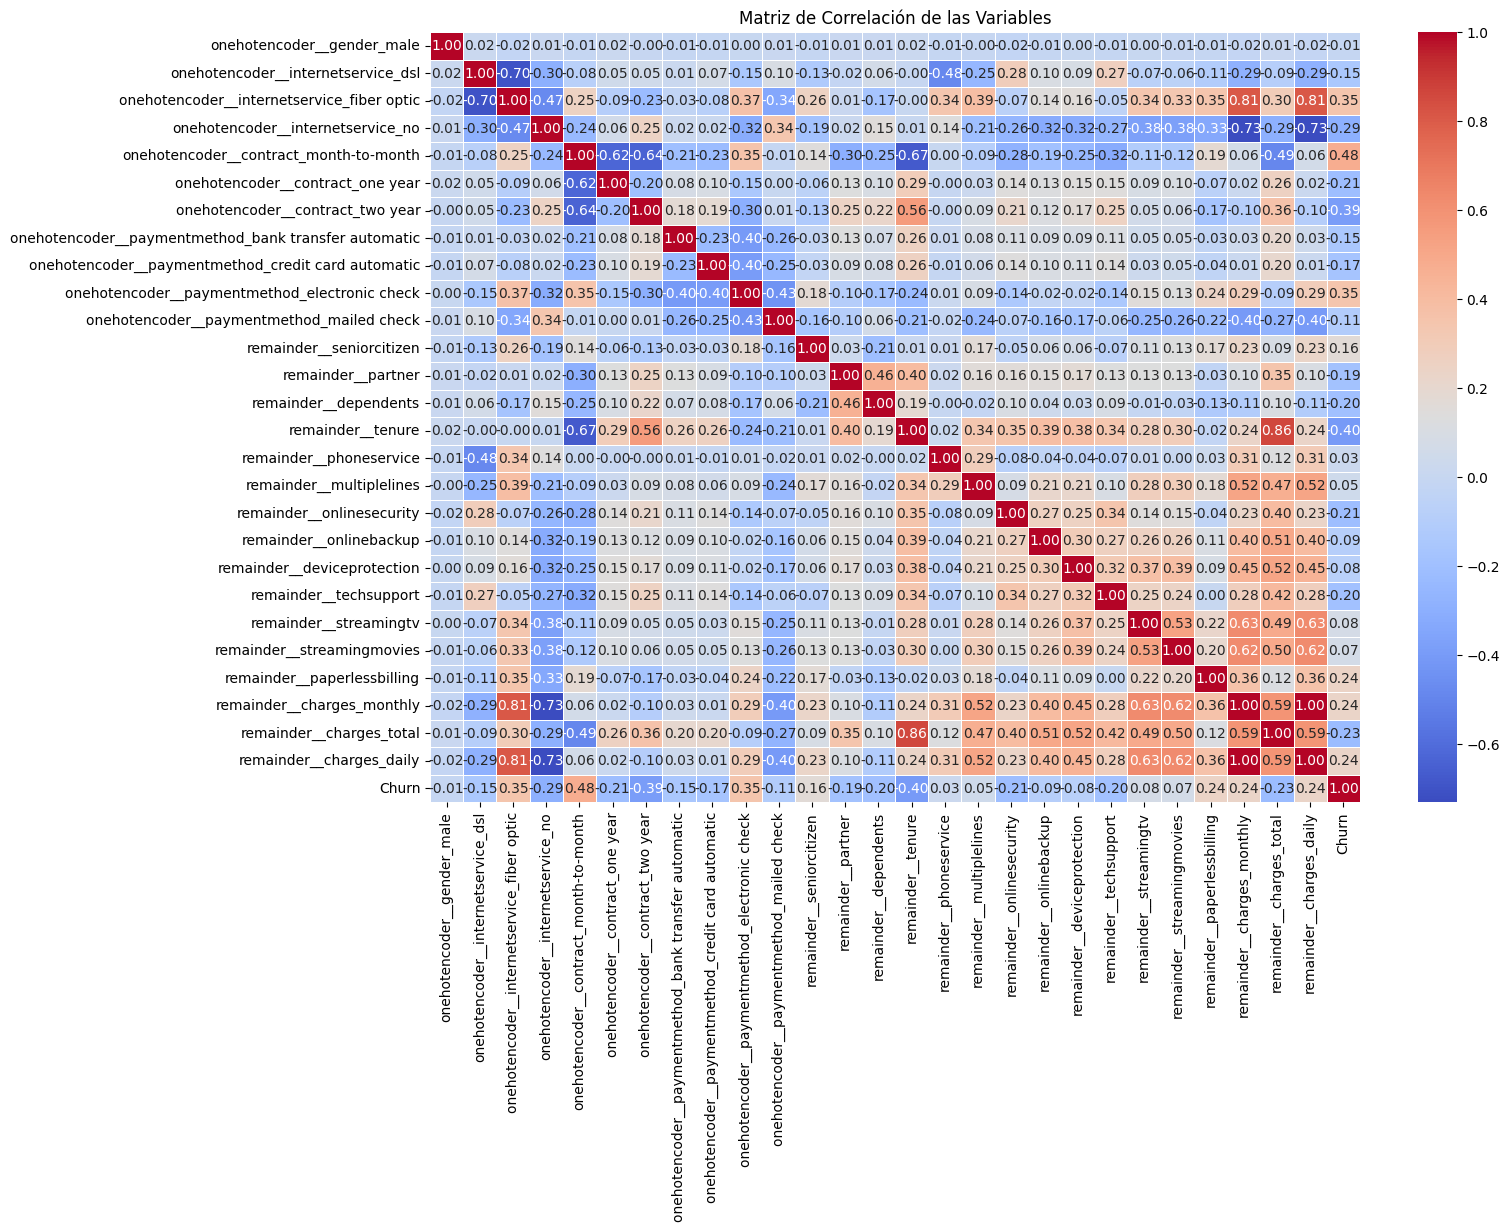

In [ ]:
# Visualizar la matriz de correlación usando un heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de las Variables')
plt.show()

In [ ]:
# Mostrar la correlación de cada variable con 'Churn'
print("\nCorrelación de cada variable con Churn:")
display(correlation_matrix['Churn'].sort_values(ascending=False))


Correlación de cada variable con Churn:


,Churn
Churn,1.000000
onehotencoder__contract_month-to-month,0.478193
onehotencoder__internetservice_fiber optic,0.351148
onehotencoder__paymentmethod_electronic check,0.347906
remainder__paperlessbilling,0.238022
remainder__charges_daily,0.235523
remainder__charges_monthly,0.235461
remainder__seniorcitizen,0.163596
remainder__streamingtv,0.077859
remainder__streamingmovies,0.070559


He decidido eliminar ciertas variables que considero no aportarán al modelo. Ciertamente modelos como el RandomForest encuentran relaciones no lineales, pero prefiero simplificar el analisis con las variables independientes más influyentes en la variable dependiente

In [ ]:
# Columnas a eliminar basadas en baja correlación con 'Churn'
baja_correlacion_cols = [
    'onehotencoder__gender_male',
    'remainder__phoneservice',
    'remainder__multiplelines',
    'remainder__streamingtv',
    'remainder__streamingmovies',
    'remainder__deviceprotection',
    'remainder__onlinebackup',
    'onehotencoder__paymentmethod_mailed check'
]

# Eliminar las columnas del DataFrame X_res_df
X_balanceada_df_reducido = X_balanceada_df.drop(columns=baja_correlacion_cols)

# Actualizar el numpy array X_res para que coincida con el DataFrame reducido
# Obtenemos los nombres de las columnas restantes
remaining_features = X_balanceada_df_reducido.columns.tolist()
# Eliminamos 'Churn' temporalmente para obtener solo las columnas de características
remaining_features.remove('Churn')

# Creamos un nuevo numpy array solo con las columnas restantes de X_balanceada_df_reducido
X_res_reduced = X_balanceada_df_reducido[remaining_features].values


print("Columnas restantes en el DataFrame:")
print(X_balanceada_df_reducido.columns)

print("\nForma del numpy array X_res_reduced después de eliminar columnas:")
print(X_res_reduced.shape)

Columnas restantes en el DataFrame:
Index(['onehotencoder__internetservice_dsl',
       'onehotencoder__internetservice_fiber optic',
       'onehotencoder__internetservice_no',
       'onehotencoder__contract_month-to-month',
       'onehotencoder__contract_one year', 'onehotencoder__contract_two year',
       'onehotencoder__paymentmethod_bank transfer automatic',
       'onehotencoder__paymentmethod_credit card automatic',
       'onehotencoder__paymentmethod_electronic check',
       'remainder__seniorcitizen', 'remainder__partner',
       'remainder__dependents', 'remainder__tenure',
       'remainder__onlinesecurity', 'remainder__techsupport',
       'remainder__paperlessbilling', 'remainder__charges_monthly',
       'remainder__charges_total', 'remainder__charges_daily', 'Churn'],
      dtype='object')

Forma del numpy array X_res_reduced después de eliminar columnas:
(10796, 19)


In [ ]:
# Calcular la matriz de correlación con el DataFrame reducido
correlation_matrix_reduced = X_balanceada_df_reducido.corr()

In [ ]:
# Mostrar la matriz de correlación reducida (primeras filas)
print("Matriz de Correlación Reducida (primeras filas):")
display(correlation_matrix_reduced.head())

Matriz de Correlación Reducida (primeras filas):


,onehotencoder__internetservice_dsl,onehotencoder__internetservice_fiber optic,onehotencoder__internetservice_no,onehotencoder__contract_month-to-month,onehotencoder__contract_one year,onehotencoder__contract_two year,onehotencoder__paymentmethod_bank transfer automatic,onehotencoder__paymentmethod_credit card automatic,onehotencoder__paymentmethod_electronic check,remainder__seniorcitizen,remainder__partner,remainder__dependents,remainder__tenure,remainder__onlinesecurity,remainder__techsupport,remainder__paperlessbilling,remainder__charges_monthly,remainder__charges_total,remainder__charges_daily,Churn
onehotencoder__internetservice_dsl,1.000000,-0.701670,-0.295524,-0.080328,0.052495,0.048859,0.014721,0.068982,-0.146300,-0.126469,-0.019524,0.062106,-0.004516,0.283659,0.270169,-0.109944,-0.287939,-0.091628,-0.287938,-0.145430
onehotencoder__internetservice_fiber optic,-0.701670,1.000000,-0.473318,0.254778,-0.090592,-0.229706,-0.030703,-0.076529,0.370477,0.256268,0.006738,-0.170200,-0.000125,-0.067163,-0.049954,0.350660,0.809995,0.302848,0.810032,0.351148
onehotencoder__internetservice_no,-0.295524,-0.473318,1.000000,-0.242297,0.056565,0.247588,0.022967,0.017327,-0.315866,-0.187250,0.015103,0.151423,0.005750,-0.260644,-0.267040,-0.334242,-0.730066,-0.292780,-0.730117,-0.291025
onehotencoder__contract_month-to-month,-0.080328,0.254778,-0.242297,1.000000,-0.623243,-0.638042,-0.205237,-0.226083,0.353843,0.143506,-0.298538,-0.253711,-0.673475,-0.281330,-0.318541,0.187148,0.062407,-0.492934,0.062486,0.478193
onehotencoder__contract_one year,0.052495,-0.090592,0.056565,-0.623243,1.000000,-0.204509,0.082335,0.098685,-0.146373,-0.055260,0.128728,0.099579,0.291973,0.142129,0.147392,-0.065398,0.019029,0.257912,0.018978,-0.214755


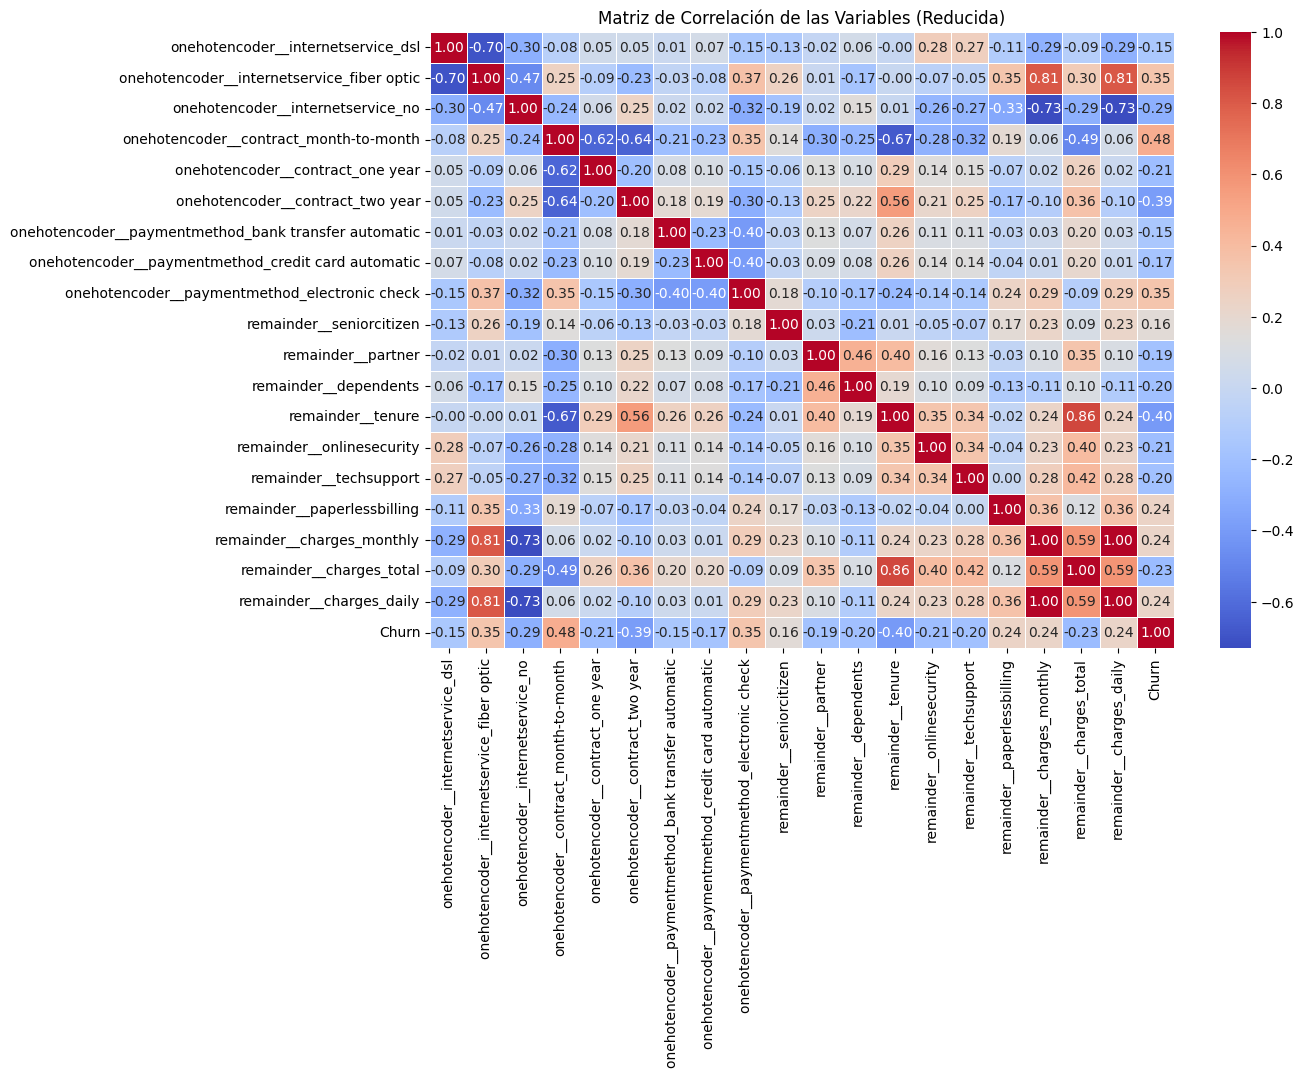

In [ ]:
# Visualizar la matriz de correlación reducida usando un heatmap
plt.figure(figsize=(12, 8)) # Ajustar el tamaño para mejor visualización
sns.heatmap(correlation_matrix_reduced, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5) # Mostrar valores con 2 decimales
plt.title('Matriz de Correlación de las Variables (Reducida)')
plt.show()

In [ ]:
# Mostrar la correlación de cada variable restante con 'Churn'
print("\nCorrelación de cada variable restante con Churn:")
display(correlation_matrix_reduced['Churn'].sort_values(ascending=False))


Correlación de cada variable restante con Churn:


,Churn
Churn,1.000000
onehotencoder__contract_month-to-month,0.478193
onehotencoder__internetservice_fiber optic,0.351148
onehotencoder__paymentmethod_electronic check,0.347906
remainder__paperlessbilling,0.238022
remainder__charges_daily,0.235523
remainder__charges_monthly,0.235461
remainder__seniorcitizen,0.163596
onehotencoder__internetservice_dsl,-0.145430
onehotencoder__paymentmethod_bank transfer automatic,-0.151492


### Análisis Dirigido

#### Tiempo de contrato vs. Cancelación (Churn)

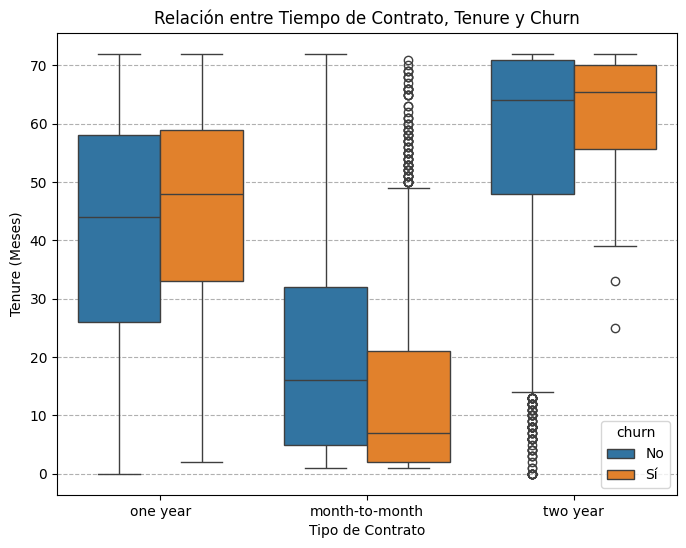

In [ ]:
# La variable 'contract' es categórica. Usaremos un boxplot para ver la distribución de 'tenure' (tiempo de contrato)
# para cada categoría de contrato y cómo se relaciona con Churn.
# Para este gráfico, usaremos el DataFrame original 'datos' ya que la columna 'contract' fue codificada.

plt.figure(figsize=(8, 6))
sns.boxplot(x='contract', y='tenure', hue='churn', data=datos) # Usamos 'datos' y la columna original 'churn'
plt.title('Relación entre Tiempo de Contrato, Tenure y Churn')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Tenure (Meses)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

#### Gasto total vs. Cancelación (Churn)

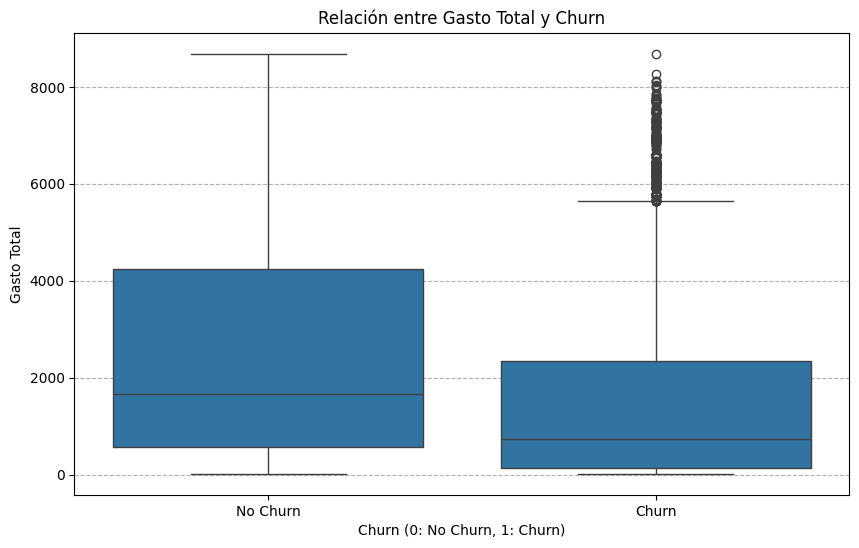

In [ ]:
# 'charges_total' es una variable numérica. Un boxplot puede mostrar la distribución del gasto total
# para los clientes que cancelan vs los que no.

plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='remainder__charges_total', data=X_balanceada_df_reducido)
plt.title('Relación entre Gasto Total y Churn')
plt.xlabel('Churn (0: No Churn, 1: Churn)')
plt.ylabel('Gasto Total')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.grid(axis='y', linestyle='--')
plt.show()

#### Servicio de Internet vs. Cancelación (Churn)

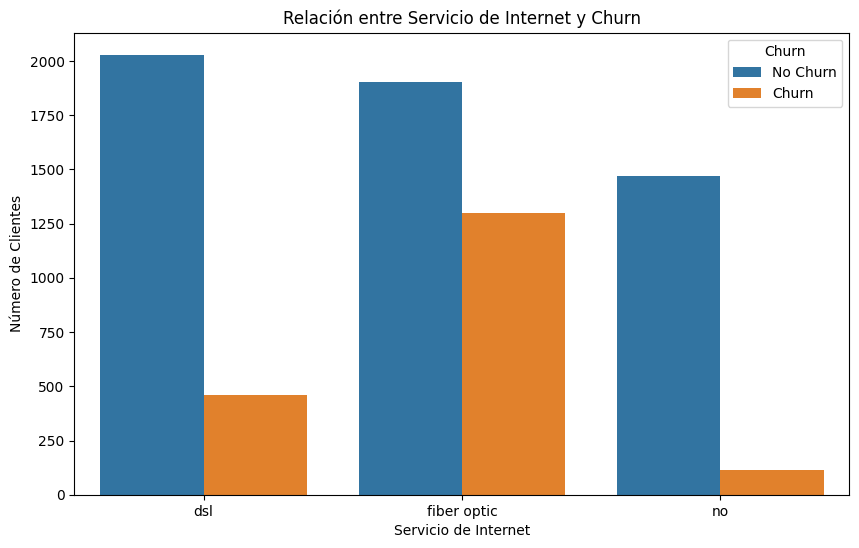

In [ ]:
# 'internetservice' es una variable categórica importante (alta correlación).
# Usaremos un countplot para ver la distribución de Churn por tipo de servicio de internet.
# Para este gráfico, usaremos el DataFrame original 'datos' ya que la columna 'internetservice' fue codificada.

plt.figure(figsize=(10, 6))
sns.countplot(x='internetservice', hue='churn', data=datos) # Usamos 'datos' y la columna original 'churn'
plt.title('Relación entre Servicio de Internet y Churn')
plt.xlabel('Servicio de Internet')
plt.ylabel('Número de Clientes')
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.show()

#### Método de Pago vs. Cancelación (Churn)

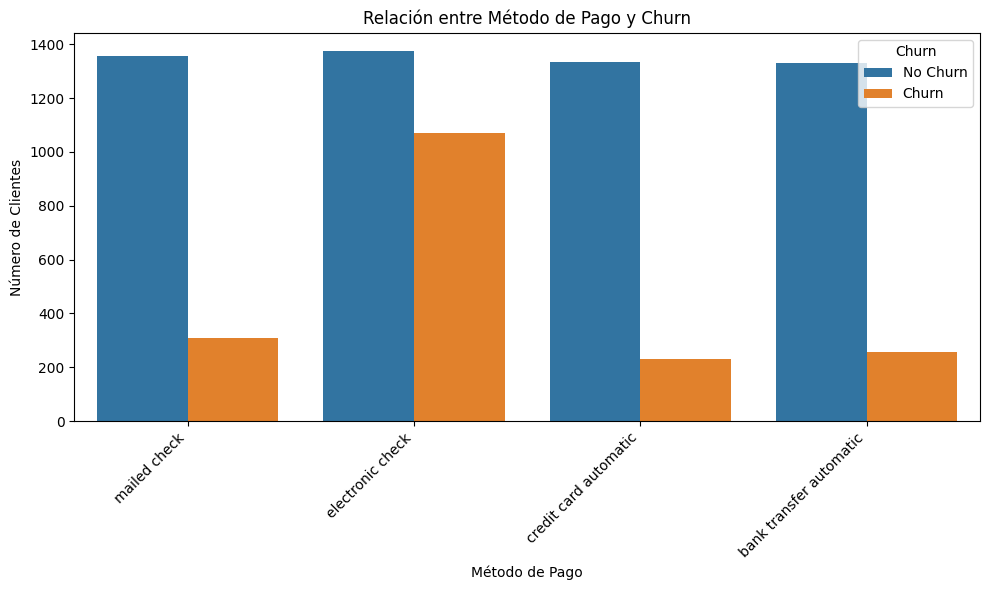

In [ ]:
# 'paymentmethod' también mostró una correlación fuerte.
# Usaremos un countplot para ver la distribución de Churn por método de pago.

plt.figure(figsize=(10, 6))
sns.countplot(x='paymentmethod', hue='churn', data=datos) # Usamos 'datos' y la columna original 'churn'
plt.title('Relación entre Método de Pago y Churn')
plt.xlabel('Método de Pago')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45, ha='right') # Rotar etiquetas para mejor visualización
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.tight_layout() # Ajustar el diseño para evitar solapamiento
plt.show()

---

## **Modelo Predictivo**

### Separación de Datos

In [ ]:
from sklearn.model_selection import train_test_split

# Divido el conjunto de datos en 70/30
X_train, X_test, y_train, y_test = train_test_split(X_res_reduced, y_balanceada, test_size=0.3, random_state=42, stratify=y_balanceada)

### Creación de Modelos

In [ ]:
# Modelo de Árbol de Decisión
from sklearn.tree import DecisionTreeClassifier

# Inicializar y entrenar el modelo de Árbol de Decisión
modelo_arbol = DecisionTreeClassifier(max_depth=10,random_state=42)
modelo_arbol.fit(X_train, y_train)

print("Modelo de Árbol de Decisión entrenado.")

Modelo de Árbol de Decisión entrenado.


In [ ]:
# Modelo de Random Forest
from sklearn.ensemble import RandomForestClassifier

# Inicializar y entrenar el modelo de Random Forest
modelo_random_forest = RandomForestClassifier(max_depth=10,random_state=42)
modelo_random_forest.fit(X_train, y_train)

print("Modelo de Random Forest entrenado.")

Modelo de Random Forest entrenado.


### Evaluación de los Modelos

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Evaluación del Modelo de Árbol de Decisión
y_pred_arbol = modelo_arbol.predict(X_test)

accuracy_arbol = accuracy_score(y_test, y_pred_arbol)
precision_arbol = precision_score(y_test, y_pred_arbol)
recall_arbol = recall_score(y_test, y_pred_arbol)
f1_arbol = f1_score(y_test, y_pred_arbol)
matriz_confusion_arbol = confusion_matrix(y_test, y_pred_arbol)

print("Métricas del Modelo de Árbol de Decisión:")
print(f"Exactitud: {accuracy_arbol:.4f}")
print(f"Precisión: {precision_arbol:.4f}")
print(f"Recall: {recall_arbol:.4f}")
print(f"F1-score: {f1_arbol:.4f}")
print("Matriz de Confusión:")
print(matriz_confusion_arbol)

print("-" * 30)

Métricas del Modelo de Árbol de Decisión:
Exactitud: 0.8290
Precisión: 0.8261
Recall: 0.8332
F1-score: 0.8296
Matriz de Confusión:
[[1336  284]
 [ 270 1349]]
------------------------------


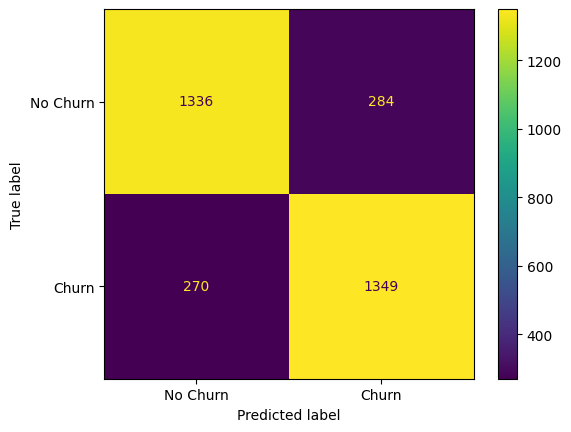

In [ ]:
# Visualización de la Matriz de Confusión del Modelo de Árbol de Decisión
from sklearn.metrics import ConfusionMatrixDisplay
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion_arbol,display_labels=['No Churn','Churn'])
visualizacion.plot();

In [ ]:
# Evaluación del Modelo de Random Forest
y_pred_random_forest = modelo_random_forest.predict(X_test)

accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
precision_random_forest = precision_score(y_test, y_pred_random_forest)
recall_random_forest = recall_score(y_test, y_pred_random_forest)
f1_random_forest = f1_score(y_test, y_pred_random_forest)
matriz_confusion_random_forest = confusion_matrix(y_test, y_pred_random_forest)

print("Métricas del Modelo de Random Forest:")
print(f"Exactitud: {accuracy_random_forest:.4f}")
print(f"Precisión: {precision_random_forest:.4f}")
print(f"Recall: {recall_random_forest:.4f}")
print(f"F1-score: {f1_random_forest:.4f}")
print("Matriz de Confusión:")
print(matriz_confusion_random_forest)

Métricas del Modelo de Random Forest:
Exactitud: 0.8598
Precisión: 0.8498
Recall: 0.8740
F1-score: 0.8618
Matriz de Confusión:
[[1370  250]
 [ 204 1415]]


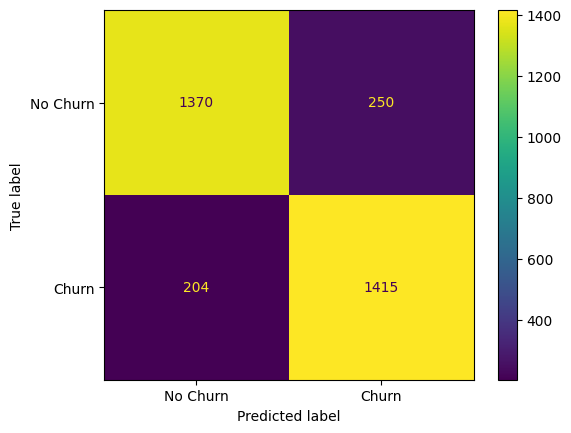

In [ ]:
# Visualización de la Matriz de Confusión del Modelo de Random Forest
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion_random_forest,display_labels=['No Churn','Churn'])
visualizacion.plot();

### Ajustando hiperparámetros para la mejora de los modelos
Ajusta los hiperparámetros de los modelos

#### Ajuste de hiperparámetros para el árbol de decisión

Definir un espacio de búsqueda para los hiperparámetros relevantes del `DecisionTreeClassifier` (por ejemplo, `max_depth`, `min_samples_split`, `min_samples_leaf`). Utilizar `GridSearchCV` o `RandomizedSearchCV` con validación cruzada para encontrar la mejor combinación de hiperparámetros en el conjunto de entrenamiento. Entrenar el modelo de Árbol de Decisión con los mejores hiperparámetros encontrados.


In [252]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Decision Tree
param_grid_arbol = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate a DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

# Instantiate GridSearchCV
grid_search_arbol = GridSearchCV(dt, param_grid_arbol, cv=5, scoring='accuracy')

In [ ]:
# Fit GridSearchCV to the training data
grid_search_arbol.fit(X_train, y_train)

# Get the best hyperparameters
best_params_arbol = grid_search_arbol.best_params_
print(f"Best hyperparameters for Decision Tree: {best_params_arbol}")

# Train the Decision Tree model with the best hyperparameters
modelo_arbol_tuned = DecisionTreeClassifier(**best_params_arbol, random_state=42)
modelo_arbol_tuned.fit(X_train, y_train)

print("\nTuned Decision Tree model trained.")

Best hyperparameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}

Tuned Decision Tree model trained.


Métricas del Modelo de Árbol de Decisión Ajustado:
Exactitud: 0.8314
Precisión: 0.8343
Recall: 0.8271
F1-score: 0.8306
Matriz de Confusión:
[[1354  266]
 [ 280 1339]]


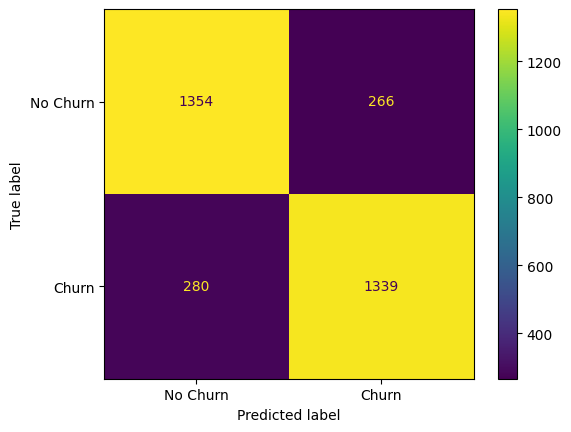

In [250]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Evaluación del Modelo de Árbol de Decisión Ajustado
y_pred_arbol_tuned = modelo_arbol_tuned.predict(X_test)

accuracy_arbol_tuned = accuracy_score(y_test, y_pred_arbol_tuned)
precision_arbol_tuned = precision_score(y_test, y_pred_arbol_tuned)
recall_arbol_tuned = recall_score(y_test, y_pred_arbol_tuned)
f1_arbol_tuned = f1_score(y_test, y_pred_arbol_tuned)
matriz_confusion_arbol_tuned = confusion_matrix(y_test, y_pred_arbol_tuned)

print("Métricas del Modelo de Árbol de Decisión Ajustado:")
print(f"Exactitud: {accuracy_arbol_tuned:.4f}")
print(f"Precisión: {precision_arbol_tuned:.4f}")
print(f"Recall: {recall_arbol_tuned:.4f}")
print(f"F1-score: {f1_arbol_tuned:.4f}")
print("Matriz de Confusión:")
print(matriz_confusion_arbol_tuned)

# Visualización de la Matriz de Confusión del Modelo de Árbol de Decisión Ajustado
visualizacion_arbol_tuned = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion_arbol_tuned,display_labels=['No Churn','Churn'])
visualizacion_arbol_tuned.plot();

#### Ajuste de hiperparámetros para el random forest

Definir un espacio de búsqueda para los hiperparámetros relevantes del `RandomForestClassifier` (por ejemplo, `n_estimators`, `max_depth`, `min_samples_split`, `min_samples_leaf`, `max_features`). Utilizar `GridSearchCV` o `RandomizedSearchCV` con validación cruzada para encontrar la mejor combinación de hiperparámetros en el conjunto de entrenamiento. Entrenar el modelo de Random Forest con los mejores hiperparámetros encontrados.


In [ ]:
# Define the parameter grid for Random Forest
param_grid_random_forest = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate a RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Instantiate GridSearchCV
grid_search_random_forest = GridSearchCV(rf, param_grid_random_forest, cv=5, scoring='accuracy')

In [249]:
# Fit GridSearchCV to the training data
grid_search_random_forest.fit(X_train, y_train)

# Get the best hyperparameters
best_params_random_forest = grid_search_random_forest.best_params_
print(f"Best hyperparameters for Random Forest: {best_params_random_forest}")

# Train the Random Forest model with the best hyperparameters
modelo_random_forest_tuned = RandomForestClassifier(**best_params_random_forest, random_state=42)
modelo_random_forest_tuned.fit(X_train, y_train)

print("\nTuned Random Forest model trained.")

Best hyperparameters for Random Forest: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}

Tuned Random Forest model trained.


Métricas del Modelo de Random Forest Ajustado:
Exactitud: 0.8567
Precisión: 0.8585
Recall: 0.8542
F1-score: 0.8563
Matriz de Confusión:
[[1392  228]
 [ 236 1383]]


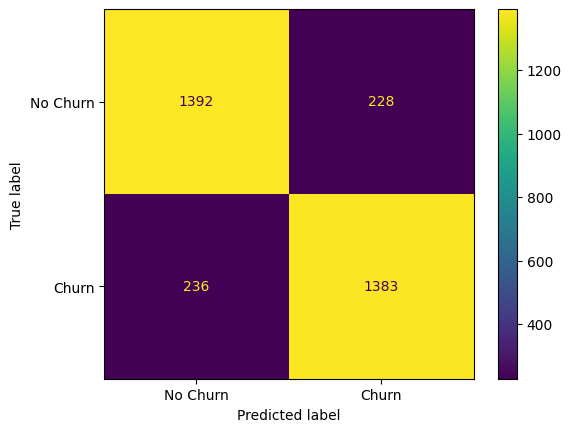

In [251]:
# Evaluación del Modelo de Random Forest Ajustado
y_pred_random_forest_tuned = modelo_random_forest_tuned.predict(X_test)

accuracy_random_forest_tuned = accuracy_score(y_test, y_pred_random_forest_tuned)
precision_random_forest_tuned = precision_score(y_test, y_pred_random_forest_tuned)
recall_random_forest_tuned = recall_score(y_test, y_pred_random_forest_tuned)
f1_random_forest_tuned = f1_score(y_test, y_pred_random_forest_tuned)
matriz_confusion_random_forest_tuned = confusion_matrix(y_test, y_pred_random_forest_tuned)

print("Métricas del Modelo de Random Forest Ajustado:")
print(f"Exactitud: {accuracy_random_forest_tuned:.4f}")
print(f"Precisión: {precision_random_forest_tuned:.4f}")
print(f"Recall: {recall_random_forest_tuned:.4f}")
print(f"F1-score: {f1_random_forest_tuned:.4f}")
print("Matriz de Confusión:")
print(matriz_confusion_random_forest_tuned)

# Visualización de la Matriz de Confusión del Modelo de Random Forest Ajustado
visualizacion_random_forest_tuned = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion_random_forest_tuned,display_labels=['No Churn','Churn'])
visualizacion_random_forest_tuned.plot();

#### Análisis Comparativo de los Modelos Ajustados (Conjunto de Prueba)

Ahora compararemos las métricas de evaluación obtenidas para los modelos de Árbol de Decisión y Random Forest después del ajuste de hiperparámetros en el conjunto de prueba.

**Métricas de Evaluación (Conjunto de Prueba):**

| Métrica          | Árbol de Decisión Ajustado | Random Forest Ajustado |
| :--------------- | :------------------------- | :--------------------- |
| Exactitud        | 0.8314               | 0.8567             |
| Precisión        | 0.8343               | 0.8585             |
| Recall           | 0.8271               | 0.8542             |
| F1-score         | 0.8306               | 0.8563             |

**Análisis de las Métricas (Conjunto de Prueba):**

* **Exactitud:** El modelo de Random Forest ajustado mantiene una exactitud ligeramente mayor (0.8567) en comparación con el Árbol de Decisión ajustado (0.8314).
* **Precisión:** La precisión de ambos modelos ajustados es similar, con el Random Forest ajustado (0.8585) teniendo una ventaja marginal sobre el Árbol de Decisión ajustado (0.8343). Esto indica que ambos modelos son comparables en su capacidad para evitar falsos positivos después del ajuste.
* **Recall:** El Random Forest ajustado presenta un Recall ligeramente superior (0.8542) en comparación con el Árbol de Decisión ajustado (0.8271). Esto sugiere que el Random Forest ajustado es un poco mejor identificando los casos positivos reales (clientes que cancelan) en el conjunto de prueba.
* **F1-score:** El F1-score del Random Forest ajustado (0.8563) es ligeramente mayor que el del Árbol de Decisión ajustado (0.8306). Esto indica que el Random Forest ajustado sigue ofreciendo un mejor equilibrio general entre precisión y recall.

**Análisis de las Matrices de Confusión (Conjunto de Prueba):**

Observando las matrices de confusión de los modelos ajustados:

* **Árbol de Decisión Ajustado:**
  * Verdaderos Positivos (VP): 1339
  * Verdaderos Negativos (VN): 1354
  * Falsos Positivos (FP): 266
  * Falsos Negativos (FN): 280
* **Random Forest Ajustado:**
  * Verdaderos Positivos (VP): 1383
  * Verdaderos Negativos (VN): 1392
  * Falsos Positivos (FP): 228
  * Falsos Negativos (FN): 236

El Random Forest ajustado tiene menos falsos positivos (228 vs 266) y un número menor de falsos negativos (236 vs 280) en comparación con el Árbol de Decisión ajustado. Esto sugiere que el ajuste de hiperparámetros en ambos modelos ha mantenido la tendencia, pero el Random Forest ajustado sigue siendo marginalmente mejor en la clasificación general.

**¿Cuál modelo tuvo el mejor desempeño en el conjunto de prueba después del ajuste?**

Después del ajuste de hiperparámetros, el **Modelo de Random Forest** sigue demostrando un desempeño ligeramente superior en el conjunto de prueba balanceado, con métricas de exactitud, precisión, recall y F1-score consistentemente un poco más altas que las del Árbol de Decisión ajustado.

## Interpretación y Conclusiones

Después de realizar el preprocesamiento de los datos, el balanceo de clases, la selección de variables y el entrenamiento y ajuste de los modelos predictivos de Árbol de Decisión y Random Forest, podemos extraer las siguientes interpretaciones y conclusiones:

### Factores Clave que Influyen en la Cancelación (Churn)

Basándonos en el análisis de correlación y la evaluación de los modelos, los siguientes factores parecen ser los más influyentes en la probabilidad de que un cliente cancele el servicio:

*   **Tiempo de Contrato (Tenure):** Existe una correlación negativa significativa con Churn. Los clientes con contratos más largos (mayor tenure) tienen una menor probabilidad de cancelar. Esto se confirma en el análisis dirigido, donde los clientes con contratos de uno y dos años muestran una distribución de tenure mucho mayor que los clientes con contratos mes a mes.
*   **Tipo de Contrato:** Los clientes con contratos mes a mes tienen una correlación positiva alta con Churn, lo que indica que son mucho más propensos a cancelar que aquellos con contratos a largo plazo (uno o dos años).
*   **Servicio de Internet:** Los clientes con servicio de internet de fibra óptica muestran una correlación positiva notable con Churn, mientras que aquellos sin servicio de internet tienen una correlación negativa significativa. Esto sugiere que, si bien la fibra óptica es un servicio premium, puede estar asociado con una mayor tasa de cancelación, posiblemente debido a expectativas no cumplidas, costos o problemas técnicos.
*   **Método de Pago:** El método de pago de cheque electrónico tiene una correlación positiva considerable con Churn, mientras que los métodos de pago automáticos (transferencia bancaria y tarjeta de crédito) tienen correlaciones negativas. Esto podría indicar que los clientes que pagan manualmente (cheque electrónico) tienen menos compromiso con la empresa o experimentan problemas con la facturación.
*   **Cargos Mensuales y Diarios:** Ambas variables tienen una correlación positiva moderada con Churn. Clientes con cargos mensuales y diarios más altos tienden a cancelar más, lo que podría estar relacionado con la percepción del valor del servicio o la asequibilidad.
*   **Seguridad Online y Soporte Técnico:** Estas variables muestran correlaciones negativas con Churn. Los clientes que utilizan servicios de seguridad online y soporte técnico son menos propensos a cancelar, lo que sugiere que estos servicios adicionales contribuyen a la satisfacción y retención del cliente.
*   **Clientes Senior Citizen:** Los clientes de la tercera edad tienen una correlación positiva moderada con Churn. Podría haber factores demográficos o de uso de tecnología que influyan en esta tendencia.
*   **Clientes con Partner y Dependents:** Tener pareja y dependientes muestra una correlación negativa con Churn. Los clientes con una estructura familiar pueden tener una mayor necesidad de servicios de telecomunicaciones estables y ser menos propensos a cambiar de proveedor.

### Comparativa y Evaluación de los Modelos

Después del ajuste de hiperparámetros, el modelo de **Random Forest** demostró un rendimiento ligeramente superior en el conjunto de prueba en comparación con el modelo de Árbol de Decisión, obteniendo métricas de Exactitud, Precisión, Recall y F1-score marginalmente más altas.

Aunque ambos modelos mostraron cierta disminución en el rendimiento del conjunto de entrenamiento al conjunto de prueba (lo que sugiere un ligero overfitting en ambos casos), el Random Forest ajustado logró mantener una mejor generalización.

La matriz de confusión del Random Forest ajustado mostró una mejor capacidad para clasificar correctamente tanto a los clientes que cancelan (Verdaderos Positivos) como a los que no (Verdaderos Negativos), con un menor número de Falsos Positivos y Falsos Negativos en comparación con el Árbol de Decisión ajustado.

En general, el ajuste de hiperparámetros ayudó a mejorar el rendimiento de generalización de ambos modelos, pero el Random Forest ajustado se posicionó como el modelo más robusto para predecir la cancelación de clientes en este conjunto de datos balanceado.

### Estrategias de Retención Propuestas

Basadas en los factores clave identificados, se proponen las siguientes estrategias de retención de clientes para TelecomX:

*   **Fomentar Contratos a Largo Plazo:**
    *   Ofrecer descuentos o beneficios exclusivos a los clientes que renueven sus contratos a un año o dos años.
    *   Implementar programas de fidelidad que recompensen a los clientes con mayor tenure.
    *   Comunicar claramente los beneficios de los contratos a largo plazo en comparación con los contratos mes a mes.

*   **Mejorar la Experiencia del Cliente con Fibra Óptica:**
    *   Investigar las razones detrás de la mayor tasa de cancelación en clientes de fibra óptica. ¿Hay problemas de velocidad, estabilidad, o soporte técnico?
    *   Fortalecer el soporte técnico especializado para usuarios de fibra óptica.
    *   Considerar planes de fibra óptica que ofrezcan mayor flexibilidad o precios competitivos para reducir la percepción de alto costo.

*   **Optimizar los Métodos de Pago:**
    *   Promover activamente los métodos de pago automáticos (transferencia bancaria y tarjeta de crédito) ofreciendo incentivos (por ejemplo, pequeños descuentos en la factura).
    *   Simplificar el proceso de pago con cheque electrónico y ofrecer alternativas digitales fáciles de usar.
    *   Investigar posibles problemas de facturación que puedan estar afectando a los usuarios de cheque electrónico.

*   **Gestionar los Niveles de Cargos:**
    *   Analizar la relación entre los cargos mensuales/diarios altos y la cancelación. ¿Los clientes perciben que no están obteniendo valor por su dinero?
    *   Considerar la posibilidad de ofrecer opciones de planes más flexibles o personalizados que se ajusten mejor a las necesidades y presupuestos de los clientes.
    *   Comunicar claramente el valor de los servicios en relación con los cargos.

*   **Destacar los Beneficios de la Seguridad Online y el Soporte Técnico:**
    *   Promocionar activamente los servicios de seguridad online y soporte técnico como un valor añadido que contribuye a una experiencia positiva.
    *   Ofrecer periodos de prueba gratuitos o descuentos en estos servicios para fomentar su adopción.

*   **Atención Especial a Segmentos Vulnerables:**
    *   Desarrollar estrategias de retención específicas para clientes senior citizens, entendiendo sus necesidades y preferencias.
    *   Considerar programas de apoyo o asistencia técnica personalizados para este segmento.

*   **Programas de Fidelidad para Clientes con Partner y Dependents:**
    *   Aunque este segmento es menos propenso a cancelar, se pueden implementar programas de fidelidad o beneficios familiares para fortalecer su lealtad.

Al abordar proactivamente estos factores clave y implementar estrategias de retención dirigidas, TelecomX puede reducir significativamente su tasa de cancelación y mejorar la lealtad de sus clientes.

In [254]:
import pickle

# Guardar el modelo de Random Forest ajustado
filename = 'champion.pkl'
pickle.dump(modelo_random_forest_tuned, open(filename, 'wb'))

print(f"Modelo guardado como '{filename}'")

Modelo guardado como 'champion.pkl'
